In [1]:
# Random Forest:
# -supervised machine learning algorithm that can handle both
# regression(numeric target variable) and classification(categorical target variable) tasks.
# -labeled target variable
# -An ensemble method,meaning they combine predictions from other models.
# -Each of the smaller models in the random forest ensemble is a decision tree

# Importing Package

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# Upload Files
from google.colab import files
uploaded=files.upload()


Saving bank.csv to bank.csv


In [3]:
import pandas as pd
bank_data = pd.read_csv("bank.csv",sep=';')
bank_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Select only required column
bank_data = bank_data[['age', 'default', 'cons.price.idx', 'cons.conf.idx', 'y']]

# Convert default column(categorical-->numeric)
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})

# Convert target y column
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [5]:
bank_data.head(20)

,age,default,cons.price.idx,cons.conf.idx,y
0,56,0,93.994,-36.4,0
1,57,0,93.994,-36.4,0
2,37,0,93.994,-36.4,0
3,40,0,93.994,-36.4,0
4,56,0,93.994,-36.4,0
5,45,0,93.994,-36.4,0
6,59,0,93.994,-36.4,0
7,41,0,93.994,-36.4,0
8,24,0,93.994,-36.4,0
9,25,0,93.994,-36.4,0


In [6]:
bank_data.tail(20)

,age,default,cons.price.idx,cons.conf.idx,y
41168,38,0,94.767,-50.8,0
41169,62,0,94.767,-50.8,0
41170,40,0,94.767,-50.8,0
41171,33,0,94.767,-50.8,1
41172,31,0,94.767,-50.8,1
41173,62,0,94.767,-50.8,1
41174,62,0,94.767,-50.8,1
41175,34,0,94.767,-50.8,0
41176,38,0,94.767,-50.8,0
41177,57,0,94.767,-50.8,0


In [7]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = rf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8906287933964554


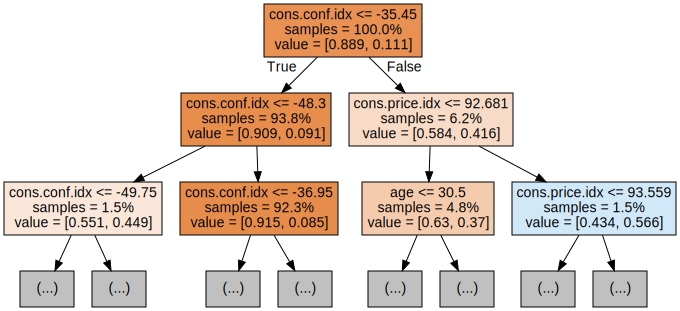

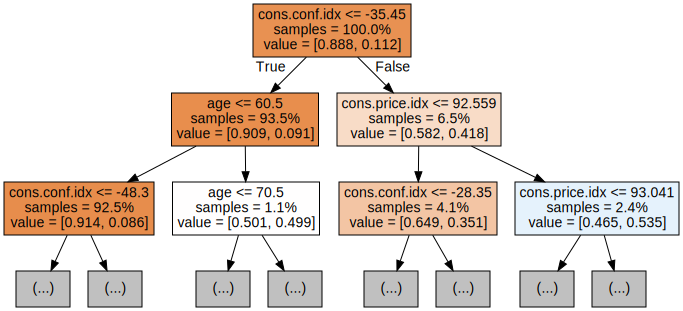

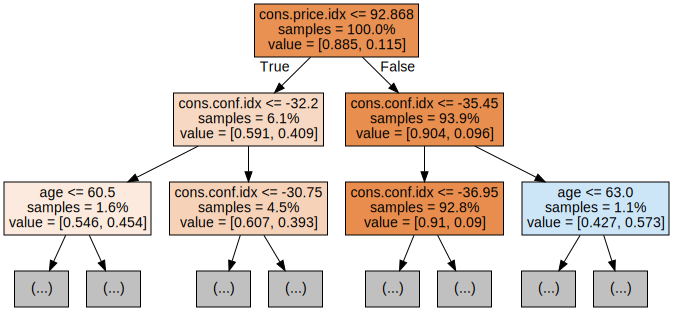

In [11]:
# Visualizing the Results
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [12]:
param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42
)

In [13]:
# Fit to training data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ea0da24ae70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ea0da24ad20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ea0da53a4b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ea0da53baa0>},
                   random_state=42, scoring='accuracy')

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 230}


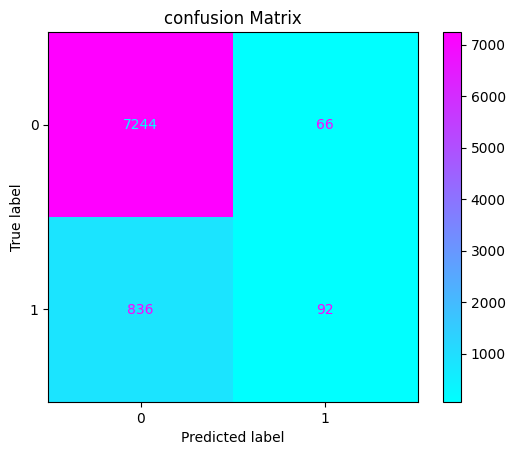

In [17]:
import matplotlib.pyplot as plt

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.cool)
plt.title('confusion Matrix')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # you can change k

# Train on training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8804321437242049
Precision: 0.4426559356136821
Recall: 0.23706896551724138


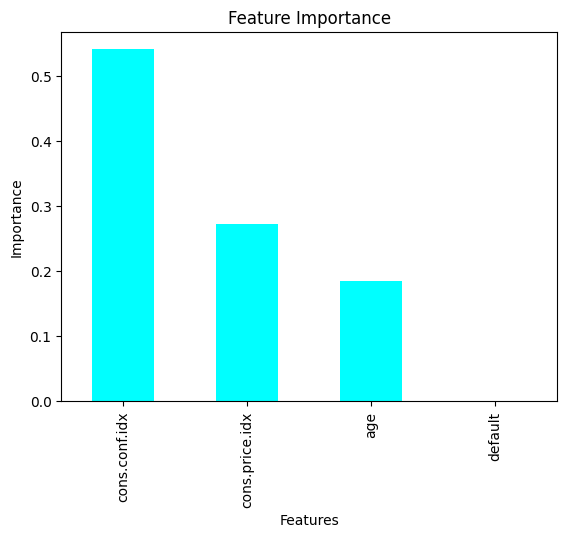

In [19]:
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot.bar(color='cyan')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
